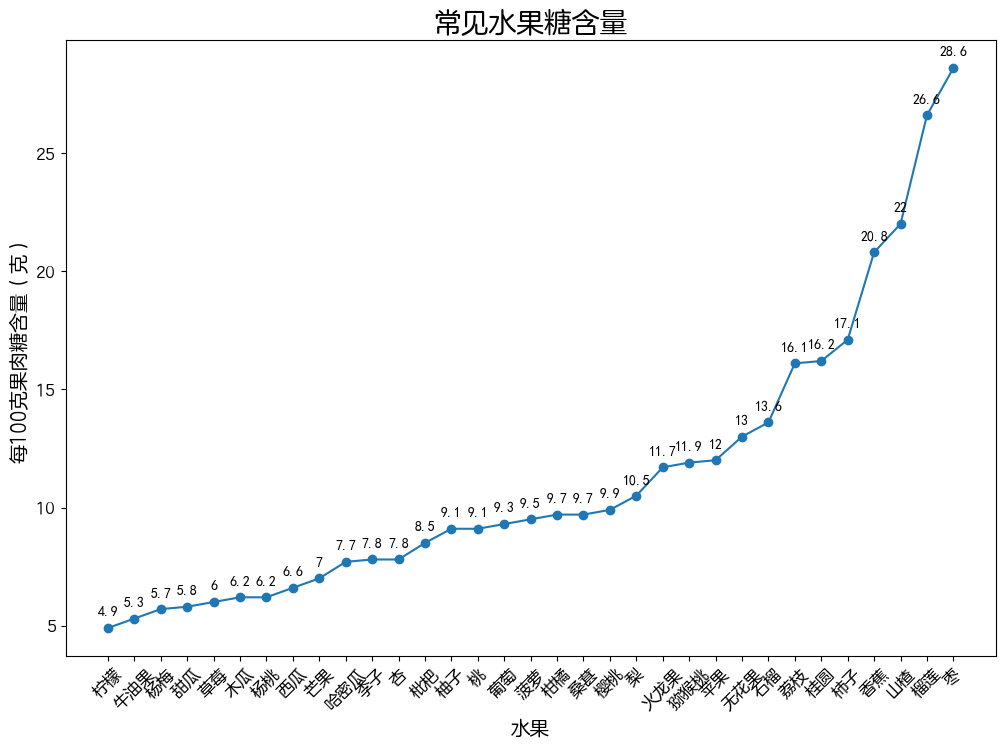

In [74]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# 字体路径示例
font_path = "../fonts/lantyl.ttf"  # 替换为您的字体文件路径

# 使用FontProperties指定字体
font_prop = FontProperties(fname=font_path)

# 数据
x = [ "柠檬", "牛油果", "杨梅", "甜瓜", "草莓", "木瓜", "杨桃", "西瓜", "芒果",
     "哈密瓜", "李子", "杏", "枇杷", "柚子", "桃", "葡萄", "菠萝", "柑橘", "桑葚",
     "樱桃", "梨", "火龙果", "猕猴桃", "苹果", "无花果", "石榴", "荔枝", "桂圆",
     "柿子", "香蕉", "山楂", "榴莲", "枣" ]
y = [4.9, 5.3, 5.7, 5.8, 6, 6.2, 6.2, 6.6, 7, 7.7, 7.8, 7.8, 8.5, 9.1, 9.1,
     9.3, 9.5, 9.7, 9.7, 9.9, 10.5, 11.7, 11.9, 12, 13, 13.6, 16.1, 16.2,
     17.1, 20.8, 22, 26.6, 28.6]

# 绘制折线图
plt.figure(figsize=(12, 8))
plt.plot(x, y, marker='o')

# 在每个点上标出数据
for i, txt in enumerate(y):
    plt.text(x[i], y[i] + 0.5, str(txt), ha='center')

# 应用字体属性
plt.title("常见水果糖含量", fontproperties=font_prop, size=20)
plt.xlabel("水果", fontproperties=font_prop, size=14)
plt.ylabel("每100克果肉糖含量（克）", fontproperties=font_prop, size=14)
plt.xticks(rotation=45, fontproperties=font_prop, size=12)
plt.yticks(fontproperties=font_prop, size=12)



# 保存图表为图片文件
plt.savefig('fruit_sugar_content.png')

# 显示图形
# plt.tight_layout()  # 调整布局
plt.show()

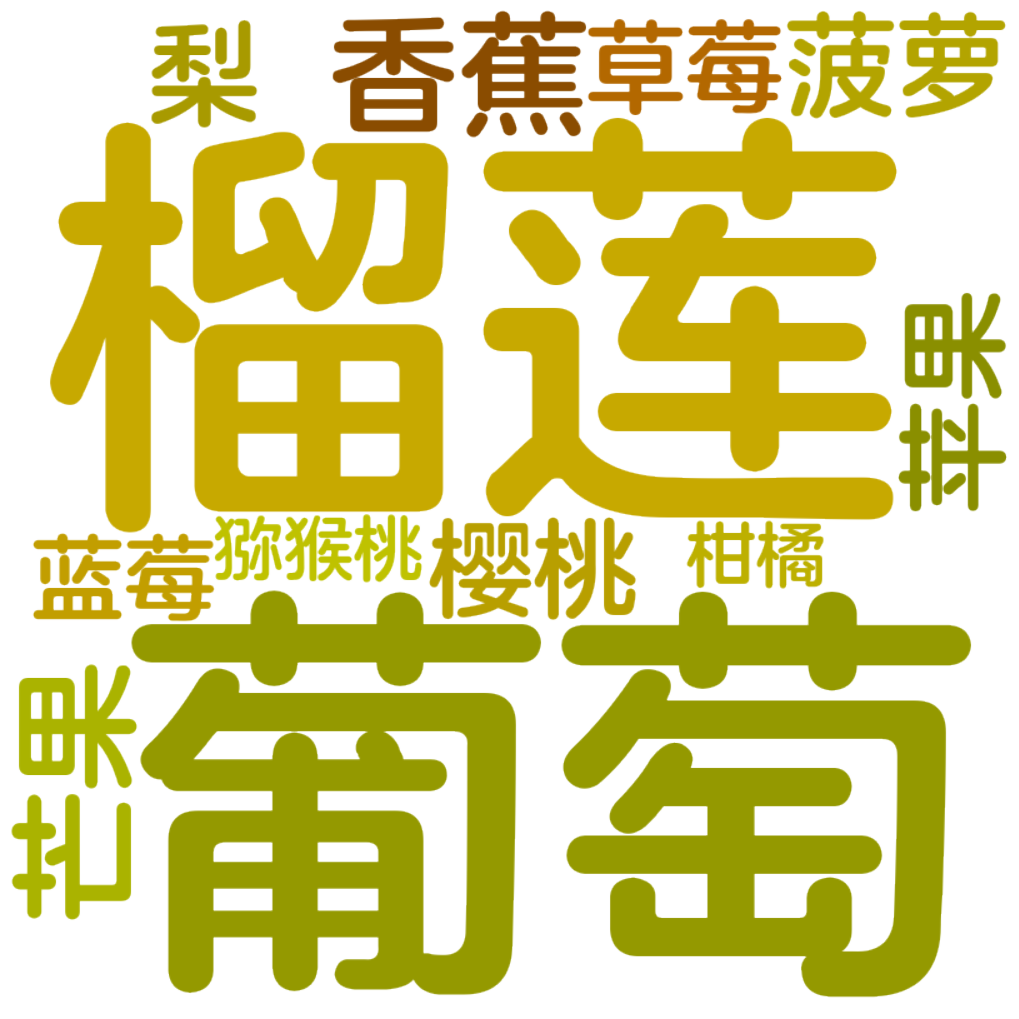

In [61]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import random

# 输入文本数据
text = "榴莲 葡萄 香蕉 芒果 菠萝 苹果 梨 樱桃 草莓  蓝莓 猕猴桃 柑橘"

def light_color_func(word=None, font_size=None, position=None, orientation=None, font_path=None, random_state=None):
    h = random.randint(30, 70)  # 选择浅色系的色调
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random.randint(70, 100)) / 255.0)  # 亮度选择较高的值
    return "hsl({}, {}%, {}%)".format(h, s, l)


# 创建词云对象，使用更亮的颜色
wordcloud = WordCloud(font_path="../fonts/lantym.ttf", 
                      background_color="rgba(255, 255, 255, 0)",
                      mode="RGBA",width=800,height=800,
                      color_func=light_color_func
                      ).generate(text)

# 绘制词云图
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)

# 显示图像
plt.show()

# 保存词云图到文件
wordcloud.to_file("wordcloud.png")


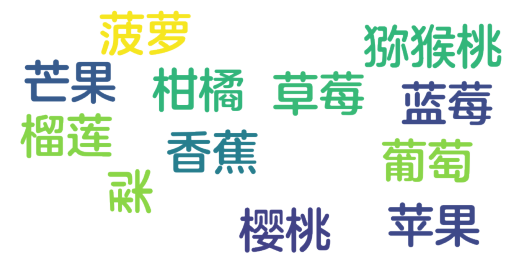

In [64]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
from matplotlib.animation import FuncAnimation, PillowWriter

# 文本数据
text = "榴莲 葡萄 香蕉 芒果 菠萝 苹果 梨 樱桃 草莓  蓝莓 猕猴桃 柑橘"

# 创建词云对象
wordcloud = WordCloud(font_path="../fonts/lantym.ttf", width=800, height=400, 
                      background_color="rgba(255, 255, 255, 0)",mode="RGBA").generate(text)

# 初始化空白图像
fig, ax = plt.subplots()
ax.set_axis_off()
im = ax.imshow(np.zeros((wordcloud.height, wordcloud.width, 4)))

# 动画更新函数
def update(i):
    # 生成词云图
    wordcloud.generate(text)
    # 更新图像数据
    im.set_array(wordcloud.to_array())
    return [im]

# 创建动画
ani = FuncAnimation(fig, update, frames=range(10), interval=1000)

# 保存动画为 GIF 文件
writer = PillowWriter(fps=1)
ani.save("wordcloud_animation.gif", writer=writer)

# 显示动画
plt.show()


In [77]:
import pandas as pd

# Data as provided in the prompt
fruit_data = {
    "水果": [
        "柠檬", "牛油果/鳄梨", "杨梅", "甜瓜", "草莓", "木瓜", "杨桃", "西瓜", "芒果",
        "哈密瓜", "李子", "杏", "枇杷", "柚子", "桃", "葡萄", "菠萝", "柑橘", "桑葚",
        "樱桃", "梨", "火龙果", "猕猴桃", "苹果", "无花果", "石榴", "荔枝", "桂圆",
        "柿子", "香蕉", "山楂", "榴莲", "枣"
    ],
    "含糖量 (g)": [
        4.9, 5.3, 5.7, 5.8, 6, 6.2, 6.2, 6.6, 7, 7.7, 7.8, 7.8, 8.5, 9.1, 9.1,
        9.3, 9.5, 9.7, 9.7, 9.9, 10.5, 11.7, 11.9, 12, 13, 13.6, 16.1, 16.2,
        17.1, 20.8, 22, 26.6, 28.6
    ],
}

# Convert the data to a pandas DataFrame
df_fruits = pd.DataFrame(fruit_data)

# Display the DataFrame to verify it looks correct
# df_fruits


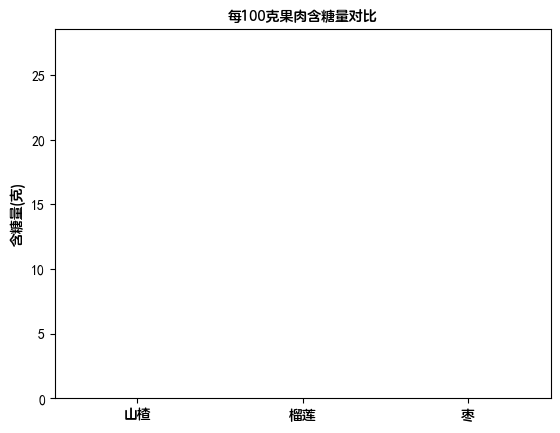

In [115]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
from matplotlib.font_manager import FontProperties

# 数据
products = ["山楂", "榴莲", "枣"]
unit_prices = [22, 26.6, 28.6]

# 初始化画布和子图
fig, ax = plt.subplots()
ax.set_ylim(0, max(unit_prices))
ax.set_xlim(-0.5, len(products) - 0.5)

# 不同产品对应的颜色
colors = ['orange', 'yellow', 'red']

# 条形图对象
bars = ax.bar(np.arange(len(products)), [0]*len(products), color=colors)

# 创建 FontProperties 对象，指定字体文件路径
font_prop = FontProperties(fname='../fonts/lantym.ttf')

# 添加标签和标题
ax.set_ylabel('含糖量(克)', fontproperties=font_prop)
ax.set_title('每100克果肉含糖量对比', fontproperties=font_prop)

# 更新函数
def update(i):
    # 更新条形图数据
    for j, bar in enumerate(bars):
        bar.set_height(i / 10 * unit_prices[j])  # 每次增加10%
    
    return bars

# 创建动画
ani = FuncAnimation(fig, update, frames=range(11), blit=True, interval=100)

# 设置横轴刻度标签为中文
ax.set_xticks(np.arange(len(products)))
ax.set_xticklabels(products, fontproperties=font_prop)  # 使用中文字体

# 显示动画
plt.show()


# 保存动画为 GIF 文件
writer = PillowWriter(fps=10)
ani.save("01.gif", writer=writer)

In [95]:
# 现在我们有了一个用户上传的GIF文件，我们将使用这个文件来进行转换示例
from moviepy.editor import VideoFileClip

# 设置GIF文件的路径和MP4文件的目标路径
uploaded_gif_path = r'01.gif'
output_mp4_path = r'01.mp4'

# 尝试将GIF转换为MP4
try:
    clip = VideoFileClip(uploaded_gif_path)
    clip.write_videofile(output_mp4_path, codec="libx264")
    conversion_success = True
except Exception as e:
    conversion_success = False
    error_message = str(e)

conversion_success, error_message if not conversion_success else output_mp4_path

Moviepy - Building video 01.mp4.
Moviepy - Writing video 01.mp4



Moviepy - Done !
Moviepy - video ready 01.mp4


(True, '01.mp4')

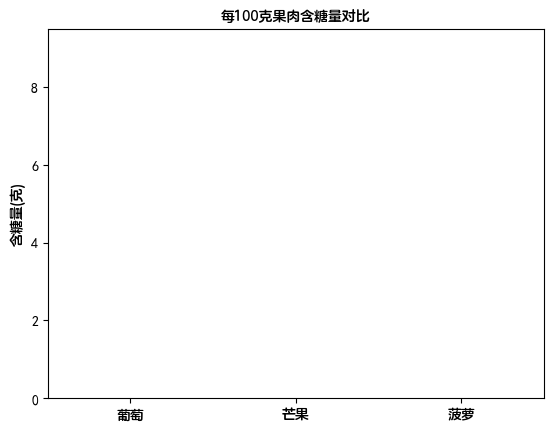

In [107]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
from matplotlib.font_manager import FontProperties

# 数据
products = ["葡萄", "芒果", "菠萝"]
unit_prices = [9.3, 9.5, 9.5]

# 初始化画布和子图
fig, ax = plt.subplots()
ax.set_ylim(0, max(unit_prices))
ax.set_xlim(-0.5, len(products) - 0.5)

# 不同产品对应的颜色
colors = ['purple', 'yellow', 'orange']

# 条形图对象
bars = ax.bar(np.arange(len(products)), [0]*len(products), color=colors)

# 创建 FontProperties 对象，指定字体文件路径
font_prop = FontProperties(fname='../fonts/lantym.ttf')

# 添加标签和标题
ax.set_ylabel('含糖量(克)', fontproperties=font_prop)
ax.set_title('每100克果肉含糖量对比', fontproperties=font_prop)

# 更新函数
def update(i):
    # 更新条形图数据
    for j, bar in enumerate(bars):
        bar.set_height(i / 10 * unit_prices[j])  # 每次增加10%
    
    return bars

# 创建动画
ani = FuncAnimation(fig, update, frames=range(11), blit=True, interval=100)

# 设置横轴刻度标签为中文
ax.set_xticks(np.arange(len(products)))
ax.set_xticklabels(products, fontproperties=font_prop)  # 使用中文字体

# 显示动画
plt.show()


# 保存动画为 GIF 文件
writer = PillowWriter(fps=10)
ani.save("02.gif", writer=writer)

In [109]:
# 现在我们有了一个用户上传的GIF文件，我们将使用这个文件来进行转换示例
from moviepy.editor import VideoFileClip

# 设置GIF文件的路径和MP4文件的目标路径
uploaded_gif_path = r'02.gif'
output_mp4_path = r'02.mp4'

# 尝试将GIF转换为MP4
try:
    clip = VideoFileClip(uploaded_gif_path)
    clip.write_videofile(output_mp4_path, codec="libx264")
    conversion_success = True
except Exception as e:
    conversion_success = False
    error_message = str(e)

conversion_success, error_message if not conversion_success else output_mp4_path

Moviepy - Building video 02.mp4.
Moviepy - Writing video 02.mp4



Moviepy - Done !
Moviepy - video ready 02.mp4


(True, '02.mp4')

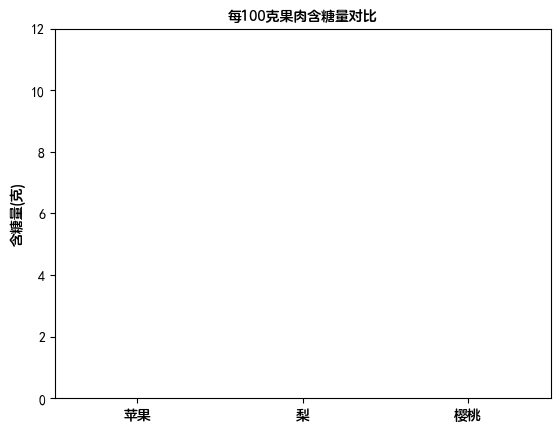

In [131]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
from matplotlib.font_manager import FontProperties

# 数据
products = ["苹果", "梨", "樱桃"]
unit_prices = [12, 10.5, 9.9]

# 初始化画布和子图
fig, ax = plt.subplots()
ax.set_ylim(0, max(unit_prices))
ax.set_xlim(-0.5, len(products) - 0.5)

# 不同产品对应的颜色
colors = ['red', 'yellow', 'purple']

# 条形图对象
bars = ax.bar(np.arange(len(products)), [0]*len(products), color=colors)

# 创建 FontProperties 对象，指定字体文件路径
font_prop = FontProperties(fname='../fonts/lantym.ttf')

# 添加标签和标题
ax.set_ylabel('含糖量(克)', fontproperties=font_prop)
ax.set_title('每100克果肉含糖量对比', fontproperties=font_prop)

# 更新函数
def update(i):
    # 更新条形图数据
    for j, bar in enumerate(bars):
        bar.set_height(i / 10 * unit_prices[j])  # 每次增加10%
    
    return bars

# 创建动画
ani = FuncAnimation(fig, update, frames=range(11), blit=True, interval=100)

# 设置横轴刻度标签为中文
ax.set_xticks(np.arange(len(products)))
ax.set_xticklabels(products, fontproperties=font_prop)  # 使用中文字体

# 显示动画
plt.show()


# 保存动画为 GIF 文件
writer = PillowWriter(fps=10)
ani.save("03.gif", writer=writer)

In [127]:
# 现在我们有了一个用户上传的GIF文件，我们将使用这个文件来进行转换示例
from moviepy.editor import VideoFileClip

# 设置GIF文件的路径和MP4文件的目标路径
uploaded_gif_path = r'03.gif'
output_mp4_path = r'03.mp4'

# 尝试将GIF转换为MP4
try:
    clip = VideoFileClip(uploaded_gif_path)
    clip.write_videofile(output_mp4_path, codec="libx264")
    conversion_success = True
except Exception as e:
    conversion_success = False
    error_message = str(e)

conversion_success, error_message if not conversion_success else output_mp4_path

Moviepy - Building video 03.mp4.
Moviepy - Writing video 03.mp4



Moviepy - Done !
Moviepy - video ready 03.mp4


(True, '03.mp4')

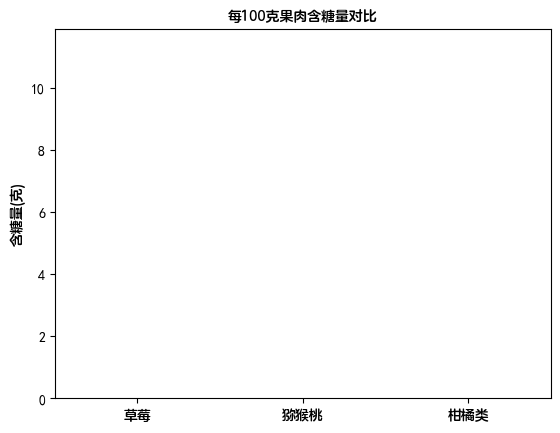

In [135]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
from matplotlib.font_manager import FontProperties

# 数据
products = ["草莓", "猕猴桃", "柑橘类"]
unit_prices = [6, 11.9, 9.7]

# 初始化画布和子图
fig, ax = plt.subplots()
ax.set_ylim(0, max(unit_prices))
ax.set_xlim(-0.5, len(products) - 0.5)

# 不同产品对应的颜色
colors = ['red', 'brown', 'orange']

# 条形图对象
bars = ax.bar(np.arange(len(products)), [0]*len(products), color=colors)

# 创建 FontProperties 对象，指定字体文件路径
font_prop = FontProperties(fname='../fonts/lantym.ttf')

# 添加标签和标题
ax.set_ylabel('含糖量(克)', fontproperties=font_prop)
ax.set_title('每100克果肉含糖量对比', fontproperties=font_prop)

# 更新函数
def update(i):
    # 更新条形图数据
    for j, bar in enumerate(bars):
        bar.set_height(i / 10 * unit_prices[j])  # 每次增加10%
    
    return bars

# 创建动画
ani = FuncAnimation(fig, update, frames=range(11), blit=True, interval=100)

# 设置横轴刻度标签为中文
ax.set_xticks(np.arange(len(products)))
ax.set_xticklabels(products, fontproperties=font_prop)  # 使用中文字体

# 显示动画
plt.show()


# 保存动画为 GIF 文件
writer = PillowWriter(fps=10)
ani.save("04.gif", writer=writer)

In [137]:
# 现在我们有了一个用户上传的GIF文件，我们将使用这个文件来进行转换示例
from moviepy.editor import VideoFileClip

# 设置GIF文件的路径和MP4文件的目标路径
uploaded_gif_path = r'04.gif'
output_mp4_path = r'04.mp4'

# 尝试将GIF转换为MP4
try:
    clip = VideoFileClip(uploaded_gif_path)
    clip.write_videofile(output_mp4_path, codec="libx264")
    conversion_success = True
except Exception as e:
    conversion_success = False
    error_message = str(e)

conversion_success, error_message if not conversion_success else output_mp4_path

Moviepy - Building video 04.mp4.
Moviepy - Writing video 04.mp4



Moviepy - Done !
Moviepy - video ready 04.mp4


(True, '04.mp4')